In [167]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

In [168]:
samples = np.random.uniform(low=-4, high=4, size=(800, 2))

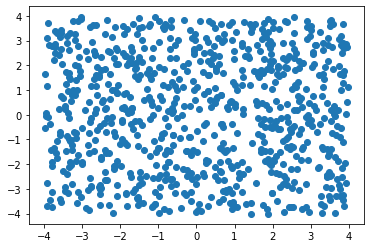

In [169]:
plt.scatter(samples[:,0], samples[:,1])
plt.show()

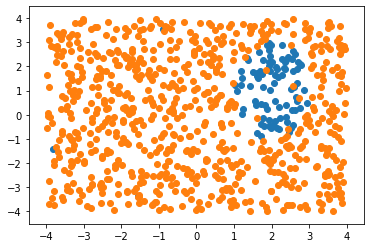

In [170]:
answers = np.zeros(len(samples))

# Simulate getting data from user

blind_spot_pos = np.array((2, 1))
blind_spot_size = np.array((1, 2))

false_positive = 0.1 # Chance they see a dot in the blind spot
false_negative = 0.01 # Chance they miss a dot outside of the blind spot

for row in range(len(answers)):
    pos = samples[row]
    displ = pos - blind_spot_pos
    displ /= blind_spot_size
    
    blind = np.linalg.norm(displ) < 1
        
    if blind:
        response = np.random.uniform() > false_positive
    else:
        response = not (np.random.uniform() > false_negative)
    
    if response:
        answers[row] = 1
    else:
        answers[row] = -1
        
plt.scatter(samples[answers == 1,0], samples[answers == 1,1])
plt.scatter(samples[answers == -1,0], samples[answers == -1,1])
plt.show()

[2.02672776 1.21251103]
[-1.96733602 -1.12821231]
[-0.11004625 -0.11858388 -0.87098616 -0.38320053] 1.2583183008729257


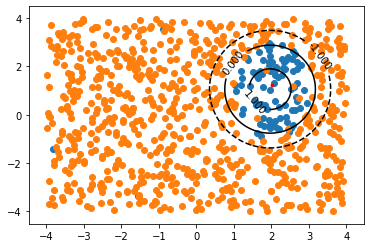

In [171]:
blind_spot_center = np.median(samples[answers==1], axis=0)
print(blind_spot_center)

print(np.mean(samples - blind_spot_center, axis=0))
D = np.hstack((samples - blind_spot_center, (samples - blind_spot_center)**2))
y = answers

clf = svm.LinearSVC(C = 1, max_iter=100000, loss='hinge')
clf.fit(D, y)

weights = clf.coef_[0]
bias = clf.intercept_[0]
print(weights, bias)

delta = 0.025
X, Y = np.meshgrid(np.arange(-4, 4, delta), np.arange(-4, 4, delta))
Xs = X - blind_spot_center[0]
Ys = Y - blind_spot_center[1]
Z = Xs * weights[0] + Ys * weights[1] + Xs*Xs*weights[2] + Ys*Ys*weights[3] + bias

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=[-1, 0, 1], colors='k')
ax.clabel(CS, inline=1, fontsize=10)
ax.scatter(samples[answers == 1,0], samples[answers == 1,1])
ax.scatter(samples[answers == -1,0], samples[answers == -1,1])
ax.plot([blind_spot_center[0]], [blind_spot_center[1]], marker='o', markersize=3, color="red")
fig.show()